# Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#eda)
3. [LSTM Deep Learning Model](#lstm)

# 1. Introduction <a name="introduction"></a>

<img src="./img/vantage.png" alt="drawing" width="200"/>

The Davis Vantage PRO 2 is an industrial-grade weather station engineered to handle the harshest environments and deliver data with scientific precision, year after year. The Vantage Pro2 offer the professional weather observer or serious weather enthusiast robust performance with a wide range of options and sensors.

#### Variables Measured
- Inside and Outside Temperature
- Inside and Outside Humidity
- Dew Point
- Wind Speed and Direction
- Wind Chill and Wind Index
- Barometric Pressure
- Rain Rate
- Solar Radiation

#### Objective
The main objective of this project is to get a model capable of predicting the exterior temperature of the next 12 hours. 

# 2. Exploratory Data Analysis <a name="eda"></a>

## 2.1 Libraries

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random
import os

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

sns.set_style("whitegrid")

## 2.2 Importing dataset

The dataset consists in a series of measurements made at the meteorological station at the University.

In [4]:
dataset = pd.read_csv('./dataset_by_hour.csv', index_col='Datetime')
dataset = dataset[['Temp_Out', 'Out_Hum', 'Dew_Pt', 'Wind_Speed',
                  'Wind_Chill', 'Rain_Rate', 'Heat_Index', 'Barometer', 'Solar_Rad',
                  'UV_Index']]
type(dataset)

pandas.core.frame.DataFrame

## 2.3 Pick dataset

In [5]:
dataset.shape

(10377, 10)

In [6]:
dataset.head(5)

,Temp_Out,Out_Hum,Dew_Pt,Wind_Speed,Wind_Chill,Rain_Rate,Heat_Index,Barometer,Solar_Rad,UV_Index
Datetime,,,,,,,,,,
2019-03-26 15:00:00,15.0,0.920000,14.377778,1.244444,15.688889,0.0,15.933333,959.622222,116.111111,0.944444
2019-03-26 16:00:00,15.0,0.910000,14.108333,1.466667,15.608333,0.0,15.808333,959.250000,114.583333,0.833333
2019-03-26 17:00:00,15.0,0.906667,14.075000,1.066667,15.616667,0.0,15.808333,958.966667,57.250000,0.266667
2019-03-26 18:00:00,15.0,0.919167,13.983333,0.400000,15.300000,0.0,15.550000,959.158333,11.000000,0.000000
2019-03-26 19:00:00,15.0,0.924167,13.958333,1.333333,15.200000,0.0,15.400000,959.691667,0.833333,0.000000


In [7]:
dataset.tail(5)

,Temp_Out,Out_Hum,Dew_Pt,Wind_Speed,Wind_Chill,Rain_Rate,Heat_Index,Barometer,Solar_Rad,UV_Index
Datetime,,,,,,,,,,
2020-05-31 19:00:00,10.75,0.7550,7.025,1.2,11.225,0.0,11.000,959.775,0.0,0.0
2020-05-31 20:00:00,10.00,0.8375,7.950,1.2,10.575,0.0,10.575,960.275,0.0,0.0
2020-05-31 21:00:00,10.00,0.8375,7.950,1.2,10.600,0.0,10.550,960.925,0.0,0.0
2020-05-31 22:00:00,10.00,0.8450,7.850,1.6,10.350,0.0,10.350,961.275,0.0,0.0
2020-05-31 23:00:00,10.00,0.8300,7.575,3.6,10.325,0.0,10.325,961.250,0.0,0.0


## 2.4 Plotting entire time series

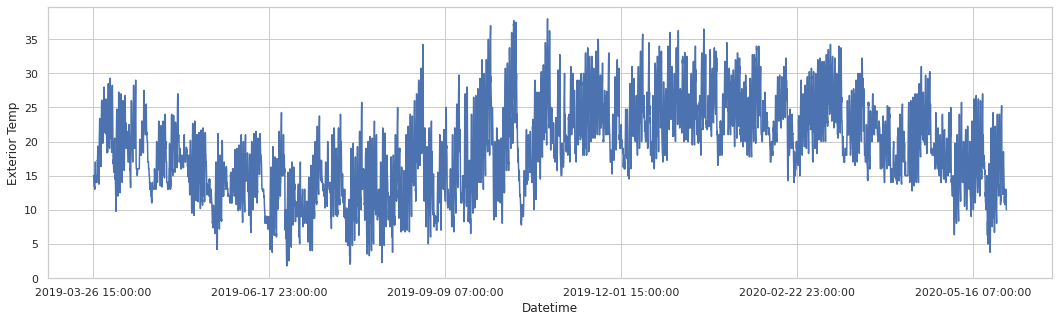

In [9]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset["Temp_Out"].plot()
plt.show()

Zooming in a bit

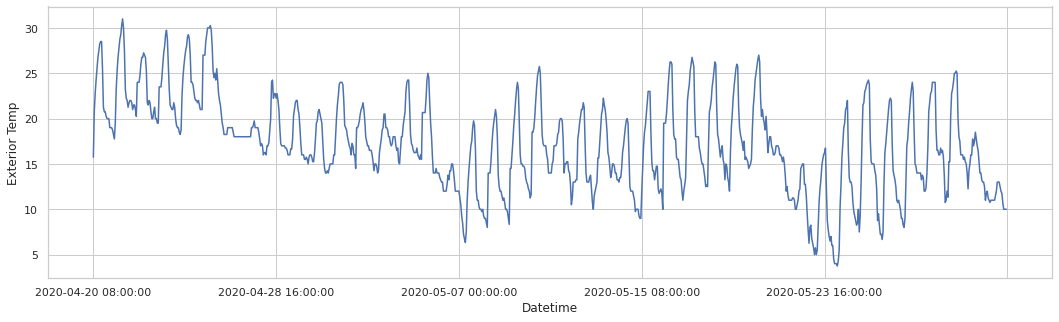

In [10]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset["Temp_Out"][-1000:].plot()
plt.show()

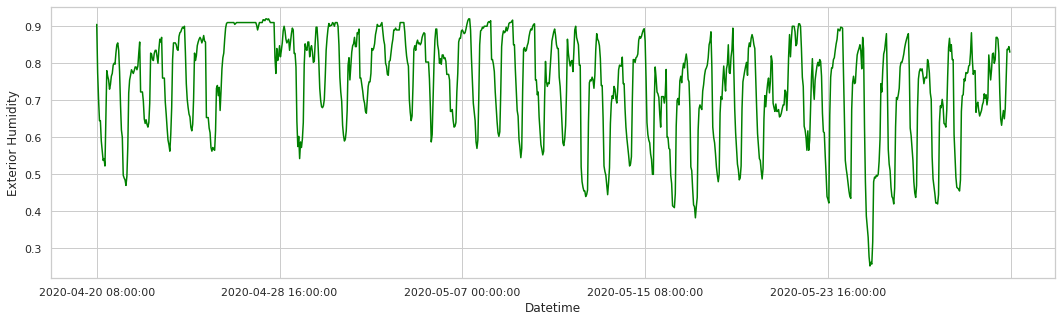

In [11]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Humidity")
dataset["Out_Hum"][-1000:].plot(c='green')
plt.show()

## 2.5 Correlation Matrix

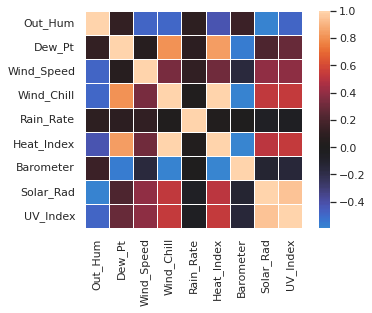

In [12]:
corr = dataset.drop(axis=1,columns=['Temp_Out']).corr()
sns.heatmap(corr,square=True,linewidths=.5,center=0)
plt.show()

Looks like Solar_Rad id highly correlated with UV_Index. Also, Wind_Chill is highly correlated with heat_index.

In [13]:
dataset.drop(axis=1, columns=["UV_Index", "Heat_Index"], inplace=True)

## 2.6 Time Resampling

In [14]:
dataset.index = pd.to_datetime(dataset.index)
dataset_mean_day = dataset.resample(rule='D').mean()
dataset_mean_month = dataset.resample(rule='M').mean()

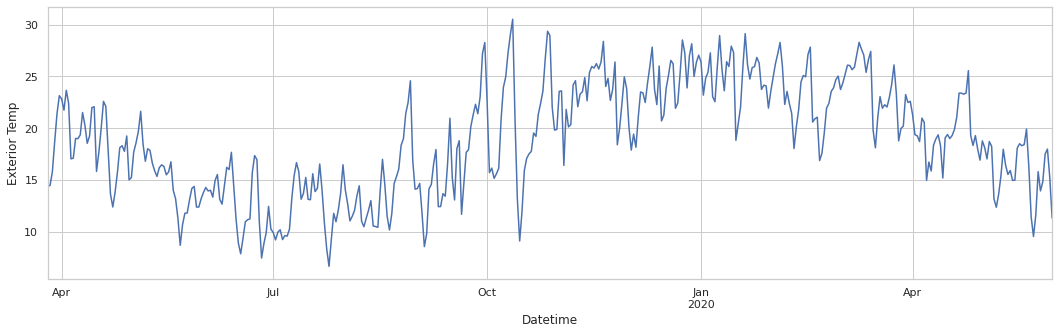

In [15]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset_mean_day["Temp_Out"].plot()
plt.show()

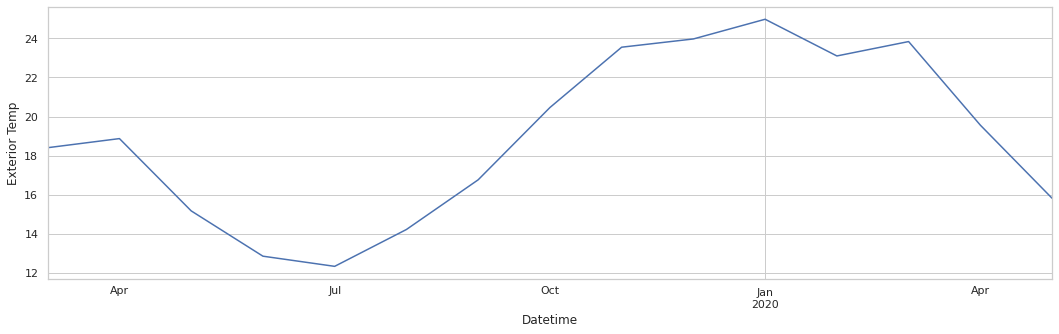

In [16]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset_mean_month["Temp_Out"].plot()
plt.show()

## 2.7 Rolling mean (Smoothing)

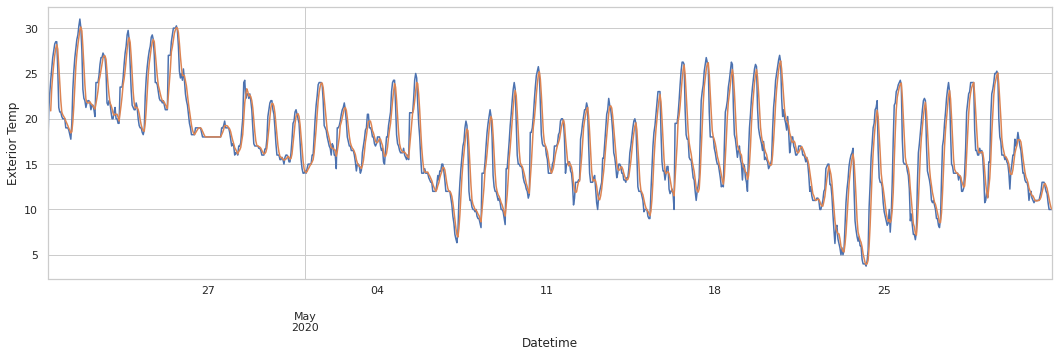

In [17]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset["Temp_Out"][-1000:].plot()
dataset['Temp_Out'][-1000:].rolling(4).mean().plot()
plt.show()

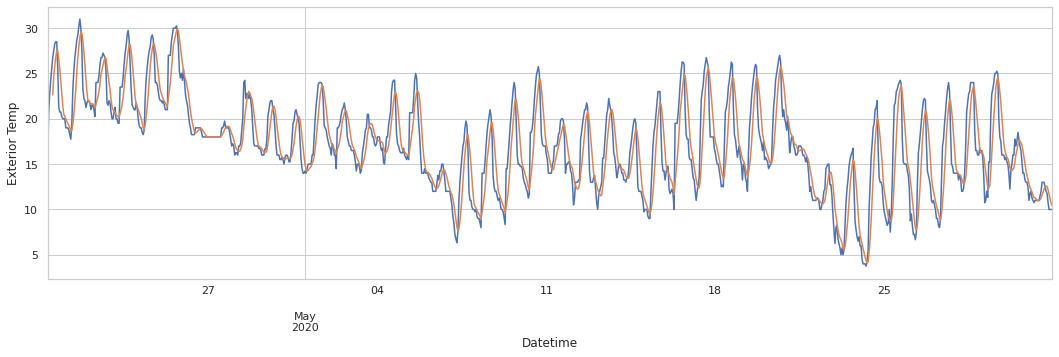

In [18]:
plt.figure(figsize=(18,5))
plt.xlabel("Date")
plt.ylabel("Exterior Temp")
dataset["Temp_Out"][-1000:].plot()
dataset['Temp_Out'][-1000:].rolling(6).mean().plot()
plt.show()

In [20]:
window = 3
dataset = dataset.rolling(window).mean().iloc[window-1:,:]

# 3. LSTM Deep Learning Model<a name="lstm"></a>

## 3.1 Data preprocessing

In [21]:
dataset['Month'] = pd.to_datetime(dataset.index.values)
dataset['Month'] = dataset['Month'].apply(lambda x: x.month)
dataset_with_dummies = dataset.join(pd.get_dummies(dataset['Month'], prefix="Month"))
dataset_with_dummies.drop('Month', axis=1,inplace=True)

In [22]:
for col in dataset_with_dummies.columns:
    dataset_with_dummies[col] = dataset_with_dummies[col].astype(np.float32)

In [23]:
dataset_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10373 entries, 2019-03-26 19:00:00 to 2020-05-31 23:00:00
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp_Out    10373 non-null  float32
 1   Out_Hum     10373 non-null  float32
 2   Dew_Pt      10373 non-null  float32
 3   Wind_Speed  10373 non-null  float32
 4   Wind_Chill  10373 non-null  float32
 5   Rain_Rate   10373 non-null  float32
 6   Barometer   10373 non-null  float32
 7   Solar_Rad   10373 non-null  float32
 8   Month_1     10373 non-null  float32
 9   Month_2     10373 non-null  float32
 10  Month_3     10373 non-null  float32
 11  Month_4     10373 non-null  float32
 12  Month_5     10373 non-null  float32
 13  Month_6     10373 non-null  float32
 14  Month_7     10373 non-null  float32
 15  Month_8     10373 non-null  float32
 16  Month_9     10373 non-null  float32
 17  Month_10    10373 non-null  float32
 18  Month_11    10373 non-null  flo

In [24]:
scaler = MinMaxScaler()

### Functions Definitions

In [25]:
def scale_data(data):
    data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
    return data

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[:9000], data[9000:10370]
    # restructure into windows of weekly data
    train = np.array(np.split(train, len(train)/5))
    test = np.array(np.split(test, len(test)/5))
    return train, test

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end < len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    return np.array(X), np.array(y)

## 3.2 Scaling and splitting dataset

In [27]:
dataset_scaled = scale_data(dataset_with_dummies)
train, test = split_dataset(dataset_scaled.values)

In [34]:
class MCDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

def build_model_lstm_mc(n_input, n_output, epochs, batch_size):
    
    X_train, y_train = to_supervised(train, n_input, n_output)
    X_test, y_test = to_supervised(test, n_input, n_output)

    # define parameters
    verbose = 0

    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], X_train.shape[1]
    # reshape output into [samples, timesteps, features]

    y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))

    # define model
    model_mc = load_model(f'./model.h5', custom_objects={'MCDropout': MCDropout})
    
    return X_test, y_test, model_mc

In [35]:
n_input = 12
n_output = 12
epochs = 100
batch_size = 64

X_test_mc, y_test_mc, model_mc = build_model_lstm_mc(n_input, n_output, epochs, batch_size)

## 3.4 Predicting and plotting results

In [36]:
preds = list()

for i in range(len(X_test_mc)):
    day = i
    pred_day = list()
    for j in range(10):
        y_hat = model_mc.predict(X_test_mc[i].reshape(1,12,X_test_mc.shape[2])).flatten()
        pred_day.append(y_hat[0])
    preds.append([day] + pred_day + [y_test_mc[i][0]])

preds = np.array(preds)

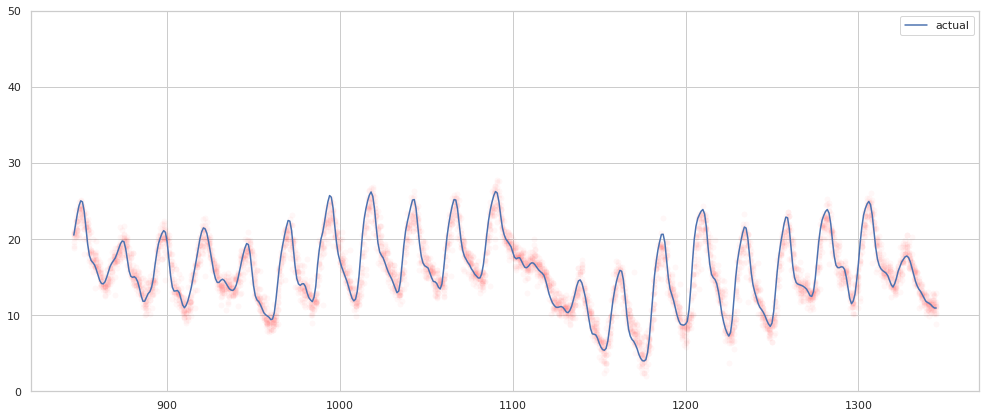

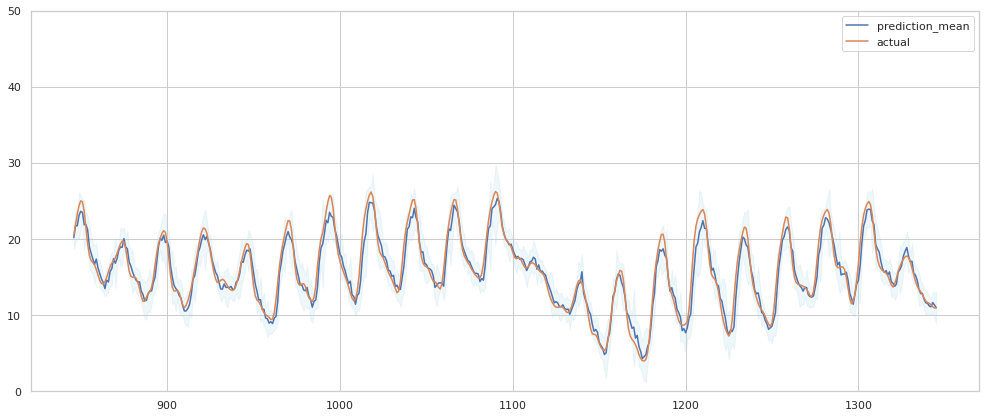

In [37]:
preds = preds[-500:,:]

upper = [np.mean(row) + np.std(row)*2 for row in preds[:,1:-1]]
lower = [np.mean(row) - np.std(row)*2 for row in preds[:,1:-1]]
mean = [np.mean(row) for row in preds[:,1:-1]]


plt.figure(figsize=(17,7))
sns.lineplot(data=preds, x=preds[:,0],y=preds[:,-1], label="actual")

for i in range(preds.shape[1]-2):
    sns.scatterplot(data=preds, x=preds[:,0], y=preds[:,1+i], color="red", alpha=.03)
    
plt.ylim(0, 50)
plt.show()


plt.figure(figsize=(17,7))
sns.lineplot(data=preds, x=preds[:,0],y=mean, label="prediction_mean")
sns.lineplot(data=preds, x=preds[:,0],y=preds[:,-1], label="actual")

plt.fill_between(
    preds[:,0],
    upper,
    lower,
    alpha=0.2,
    color='lightblue',
    label="95,4% confidence")

plt.ylim(0, 50)
plt.show()

In [38]:
def predict_one_day(day):
    rounds = 100
    preds_one_day = list()
    preds_day = list()

    for j in range(rounds):
        y_hat = model_mc.predict(X_test_mc[day].reshape(1,12,X_test_mc.shape[2])).flatten()
        preds_day.append(y_hat)

    preds_one_day = np.array(preds_day)

    one_day_df = pd.DataFrame(np.transpose(preds_one_day))
    one_day_df['actual'] = y_test_mc[day]
    one_day_df['std'] = [np.std(row) for row in one_day_df.values[:,:-1]]
    one_day_df['mean'] = [np.mean(row) for row in one_day_df.values[:,:-2]]

    one_day_df['upper_1'] = one_day_df['mean'] + one_day_df['std']
    one_day_df['lower_1'] = one_day_df['mean'] - one_day_df['std']
    
    one_day_df['upper_2'] = one_day_df['mean'] + one_day_df['std']*2
    one_day_df['lower_2'] = one_day_df['mean'] - one_day_df['std']*2
    
    one_day_df['upper_3'] = one_day_df['mean'] + one_day_df['std']*3
    one_day_df['lower_3'] = one_day_df['mean'] - one_day_df['std']*3
    
    
    ax = plt.figure(figsize=(5,5))
    plt.yticks(np.arange(0, 40, step=5))
    plt.xticks(np.arange(1,13, step=1))

    sns.lineplot(
        data=one_day_df,
        x=one_day_df.index.values,
        y=one_day_df['actual'], label="actual")

    sns.lineplot(
        data=one_day_df,
        x=one_day_df.index.values,
        y=one_day_df['mean'], label="mean_predicted")


    plt.fill_between(
        one_day_df.index.values,
        one_day_df['upper_1'],
        one_day_df['lower_1'],
        alpha=0.3, color='lightblue')
    
    plt.fill_between(
        one_day_df.index.values,
        one_day_df['upper_2'],
        one_day_df['lower_2'],
        alpha=0.2, color='lightblue')
    
    plt.fill_between(
        one_day_df.index.values,
        one_day_df['upper_3'],
        one_day_df['lower_3'],
        alpha=0.1, color='lightblue')

        
    plt.ylim(0,40)
    
    plt.show()

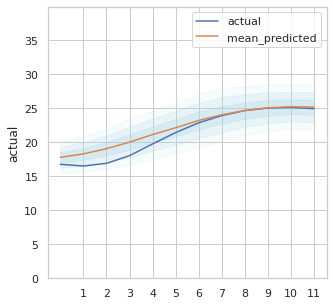

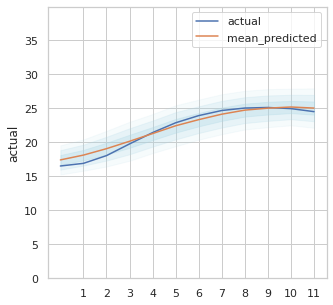

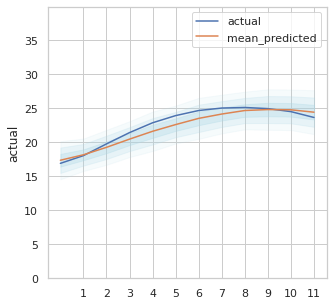

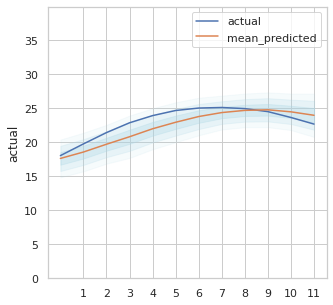

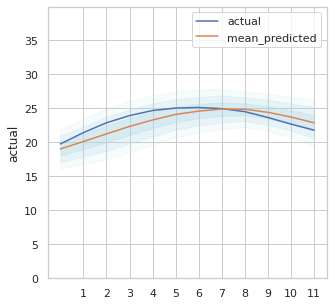

In [39]:
for i in range(5):
    predict_one_day(i)